# Author details and requirements

**Author**: Daniel Hortelano Roig</br>
**Organisation**: University of Oxford, UK</br>
**Contact**: daniel.hortelanoroig@gmail.com</br>
**Date**: December 2024

The [dd2dpy
](https://github.com/dhortela/dd2dpy/) package is required to run this notebook. This notebook is also available on Google Colab via [link](https://colab.research.google.com/drive/1I1ORC8PAWCpM8HQzW3tEAf1A924DFuD6#scrollTo=f02d9130-3198-4900-a382-9056897901f7).

# Importing simulation code

## Libraries used for session

In [ ]:
# Install and import libraries necessary for this session

import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import pylabdd as dd

  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.1
    Uninstalling numpy-2.2.1:
      Successfully uninstalled numpy-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.0 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.
langchain 0.3.12 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.0.0 which is incompatible.
pytensor 2.26.4 requires numpy<2,>=1.17.0, but you have numpy 2.0.0 which is incompa

## Helper functions

In [ ]:
def plot_dislocations(x,y,sp_inc,dx,dy,flag,LX,LY,arrowson=True):
  assert x.size == y.size == sp_inc.size == dx.size == dy.size == flag.size
  N = x.size
  qx = np.cos(sp_inc)
  qy = np.sin(sp_inc)
  for i in range(N):
    if flag[i] == 0:
      if arrowson == True:
        plt.quiver(x[i],y[i], qx[i]/2, qy[i]/2, color='black', headaxislength=0,\
                   headlength=0, scale=3, \
    linewidth=.5, units='xy', width=.05, headwidth=1)
        plt.quiver(x[i],y[i], -qx[i]/2, -qy[i]/2, color='black', headaxislength=0,\
                   headlength=0, scale=3, \
    linewidth=.5, units='xy', width=.05, headwidth=1)
        plt.quiver(x[i],y[i], -qy[i]/2, qx[i]/2, color='black', headaxislength=0,\
                   headlength=0, scale=3, \
    linewidth=.5, units='xy', width=.05, headwidth=1)
      else:
        plt.scatter(x[i],y[i], marker=(3, 0, sp_inc[i]*180/np.pi), s=60, c='blue')
      # plt.quiver(x[i],y[i], dx[i], dy[i], color='magenta')
    elif flag[i] == 1:
      plt.scatter(x[i],y[i], marker='o', s=10, c='red')
      #plt.quiver(x[i],y[i], qx[i], qy[i], color='green')
      #plt.quiver(x[i],y[i], dx[i], dy[i], color='magenta')
  ax = plt.gca()
  ax.set_xlabel(r'x ($\mu$m)',fontsize=14)
  ax.set_ylabel(r'y ($\mu$m)',fontsize=14)
  ax.set_xlim(0, LX)
  ax.set_ylim(0, LY)
  ax.set_aspect('equal')

# Session 1

First we must define the parameters which describe the material. This includes the shear modulus and the Poisson's ratio. In these sessions you will work with **Zirconium** as an example.

In [ ]:
# Define material parameters for Zirconium

mu = 37.1e3                 # Shear modulus
nu = 0.32                   # Poisson ratio

## A single dislocation

### How to create a single dislocation


Define the strength of each dislocation, i.e. the amount that they deform the material around them.

In [ ]:
# Define strength of dislocations:
b0 = 3.233e-4

In this simulation method, dislocations always exist inside of a 2D rectangular domain. Define the side lengths of the rectangle.

In [ ]:
# Define the size of the domain:
LX = 10                    # Domain length in x-direction (float)
LY = 10                    # Domain length in y-direction (float)

Select the number of dislocations to create. We wish to create just one dislocation. We define the number via the variable $\texttt{Nm}$.

In [ ]:
# Define the total number of dislocations to create:
Nm = 1                    # (int)

Let us now select the x- and y- positions of the dislocation.

In [ ]:
# Define the position of the dislocation:
xpos = LX/2                 # (float)
ypos = LY/2                 # (float)

Define the slip plane angle for the dislocation. This is the angle between the slip plane and the x-axis. In this case we set it to zero, i.e. the slip plane is the x-axis.

In [ ]:
# Define the slip plane angle of the dislocation:
spi1 = np.pi                    # (float)

Finally, let us construct the dislocation network. This is done by performing the following assignment.

In [ ]:
## Construct dislocation network

# Initialise instance of class Dislocations:
singledisl0 = dd.Dislocations(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, xpos=xpos, ypos=ypos, LX=LX, LY=LY)

By performing the previous assignment, we have initialised an instance of the $\texttt{Dislocations}$ class, and called it $\texttt{singledisl0}$. It is not important that you know what a class is. However, note the syntax, and in particular note how the dislocation instance is created using a set of inputs. The object $\texttt{singledisl0}$ now contains all of the information and simulation methods that is required to run simulations.

### Accessing information pertaining to the dislocation

In order to access information pertaining to the dislocation configuration $\texttt{singledisl0}$, you must call it using the syntax shown below. As an example, in the following we specifically access the x- and y- positions of the dislocation and the total number of dislocations, and store them in other variables. Afterwards, we print the stored contents using the $\texttt{print()}$ function. Check that these outputs match what you would expect.

In [ ]:
x_example = singledisl0.xpos
y_example = singledisl0.ypos
Nm_example = singledisl0.Nmob

print(x_example)
print(y_example)
print(Nm_example)

[5.]
[5.]
1


Note that not only are the numeric variables belonging to the dislocation stored in ```singledisl0```, but also its functions. For example, call its ```plot_stress_simple()``` function to plot the compressive and tensile stresses surrounding the dislocation. Note that this function has an optional input ```arrowson=True``` which allows you to plot the half-plane representation associated to each dislocation. Use ```arrowson=False``` as input to ignore the half-plane representation.

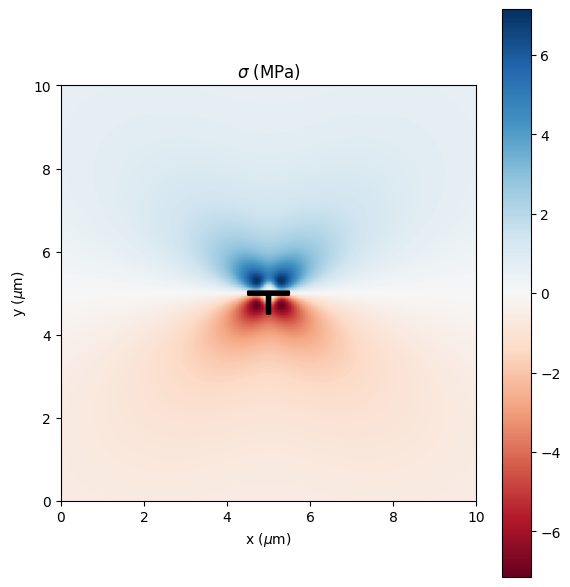

In [ ]:
singledisl0.plot_stress_simple(arrowson=True)

### Plotting the dislocation

```plot_functions()``` is a function which makes decent looking plots of the dislocations. You can call it like this.

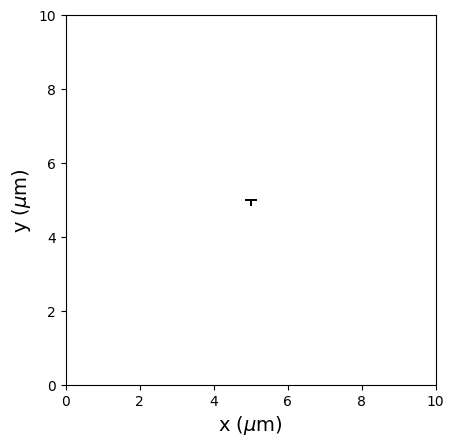

In [ ]:
plot_dislocations(singledisl0.xpos,singledisl0.ypos,singledisl0.sp_inc,singledisl0.dx,singledisl0.dy,singledisl0.flag,LX,LY,arrowson=True)

## Multiple dislocations

### How to create multiple dislocations

Creating multiple dislocations is slightly different to creating just one dislocation. Let us start at the beginning of the dislocation configuration creation. The following parameters are defined similarly as before. In this case we create 4 dislocations.

In [ ]:
# Strength of dislocations:
b0 = 3.233e-4

# Size of the domain:
LX = 10                    # Domain length in x-direction (float)
LY = 10                    # Domain length in y-direction (float)

# Total number of dislocations to create:
Nm = 4                    # (int)

In the case of multiple dislocations, the dislocation positions are defined differently. When more than one dislocation is created, you must define the positions as arrays (or lists), with one entry corresponding per dislocation. They are defined as follows.

In [ ]:
d = LY*0.1 # Distance between dislocations
x0 = 0.5*(LX - d) # x-position of first dislocation
y0 = 0.5*(LY - d) # y-position of first dislocation

# Note that each array contains four entries,
# since there are four dislocations in total.
xpos = np.array([x0, x0+d, x0, x0+d])
ypos = np.array([y0, y0+d, y0+d, y0])

For the dislocation slip plane angles $\texttt{spi1}$, you have a choice. You may either (1) assign a single number to it, in which case all of your dislocations will have the same slip plane angle, or you may (2) define it as an array, with one entry corresponding per dislocation. In the latter options, your dislocations will all have custom slip plane angles according to how exactly you defined $\texttt{spi1}$.

In [ ]:
# Define the slip plane angles of the dislocations

# For option (1), you may assign a single number to spi1 for example as follows:
spi1 = 0                   # (float)

In [ ]:
## Construct dislocation network

# Initialise instance of class Dislocations:
multidisl0 = dd.Dislocations(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, xpos=xpos, ypos=ypos, LX=LX, LY=LY)

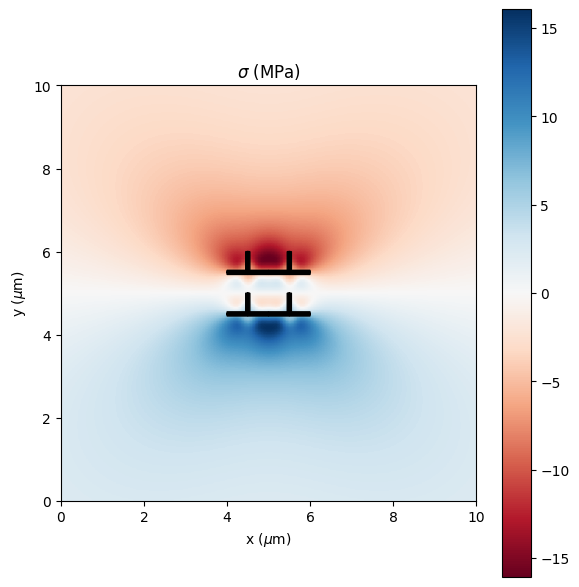

In [ ]:
multidisl0.plot_stress_simple(arrowson=True)

You may otherwise assign an array to $\texttt{spi1}$ for example as follows.

In [ ]:
# You may otherwise assign an array to spi1 for example as follows:
spi1 = np.array([0,0,180,180]) * np.pi/180                    # (float)

# Note that this operation multiplies np.pi/180 to each element of the array
# Also note that np.pi is equal to pi, the constant

You may thus achieve the following configuration and associated visualisation.

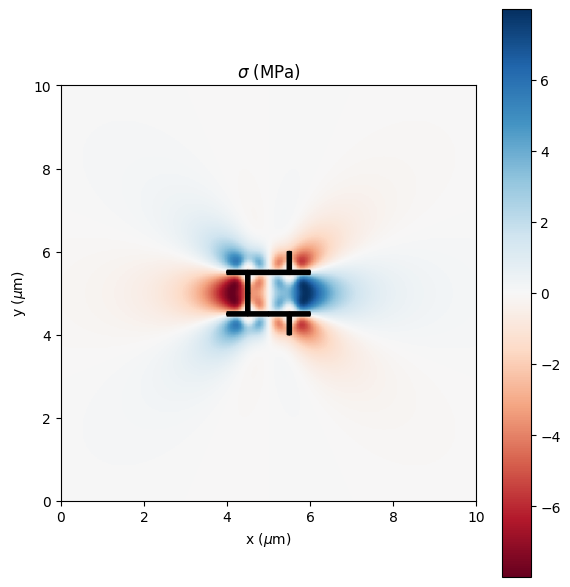

In [ ]:
## Construct dislocation network

# Initialise instance of class Dislocations:
multidisl1 = dd.Dislocations(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, xpos=xpos, ypos=ypos, LX=LX, LY=LY)

multidisl1.plot_stress_simple(arrowson=True)

### A complete example

Putting everything together for multiple dislocations, here is another example. This time a more complex way of specifing the arrays has been used.

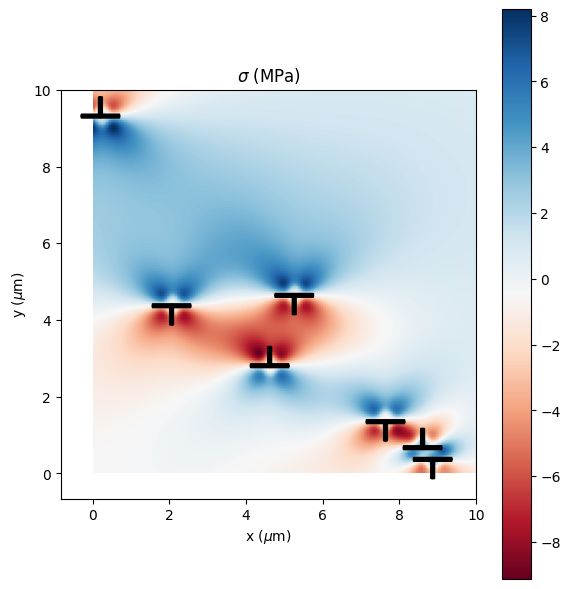

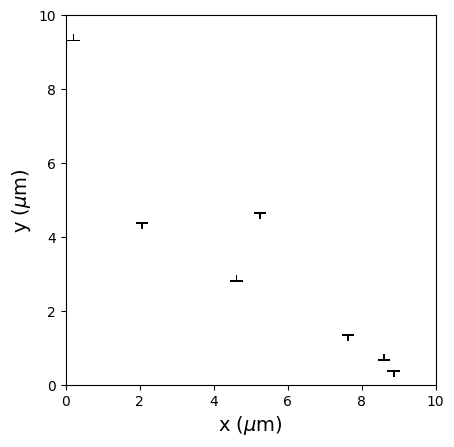

In [ ]:
# Strength of dislocations:
b0 = 3.233e-4

# Size of the rectangular domain:
LX = 10
LY = 10

# Total number of dislocations to create:
Nm = 7

# Generate random positions somewhere inside the rectangular domain:
# np.random.rand(Nm) : Array of length Nm where each entry is a number from 0 to 1
xpos = LX * np.random.rand(Nm)
ypos = LY * np.random.rand(Nm)



# Define the slip plane angles of the dislocations:

rounded_down = int(Nm/2) # int() is a function which converts a number to an integer.
# If that number is a decimal it rounds down, e.g. int(2.8)->2

temp0 = np.ones(int(Nm/2)) # Creates array of 1s of size Nm/2

temp1 = temp0 * 0 # Array of 0s of size Nm/2

temp1_length = len(temp1) # Length of array temp1

spi1 = np.append(temp1, np.ones(Nm - temp1_length) * 180*np.pi/180)



## Construct dislocation network

# Initialise instance of class Dislocations:
multidisl2 = dd.Dislocations(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, xpos=xpos, ypos=ypos, LX=LX, LY=LY)

## Plotting

multidisl2.plot_stress_simple(arrowson=True)
plot_dislocations(multidisl2.xpos,multidisl2.ypos,multidisl2.sp_inc,multidisl2.dx,multidisl2.dy,multidisl2.flag,LX,LY,arrowson=True)

Here is a way of drawing pretty stress plots which exclude the dislocation signs.

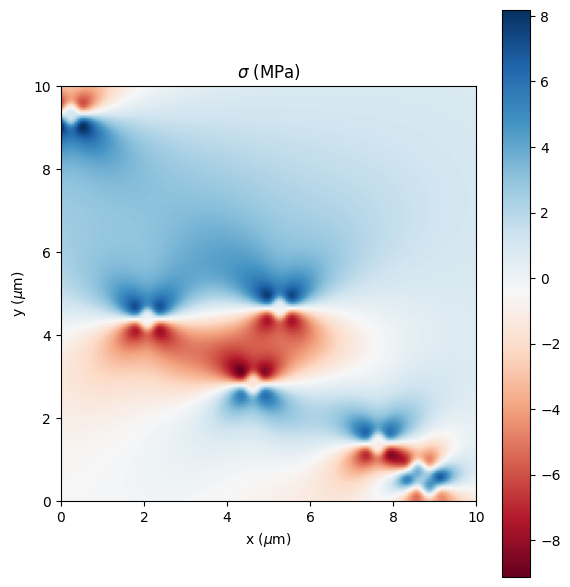

In [ ]:
multidisl2.plot_stress_simple(arrowson=False)

# Code for reference

For reference, the following cell contains a list of useful variables stored by a dislocation configuration and how to access them. Remember that you can only access them after you create the dislocation configuration.



```
# Basic example creation of a dislocation configuration:
dd = dd.Dislocation(Nm=Nm, Ns=0, mu=mu, nu=nu, b0=b0, spi1=spi1, xpos=xpos, ypos=ypos, LX=LX, LY=LY)

# Variables
dd.Nmob # Number of mobile dislocations
dd.rho_m # Density of mobile dislocations
dd.sp_inc # Slip plane angles of each dislocation -- always an array
dd.xpos # x-positions -- array in general
dd.ypos # y-positions -- array in general

# Functions (shown inputs are the defaults)
dd.plot_stress_simple(arrowson=True)

plot_dislocations(dd.xpos,dd.ypos,dd.sp_inc, \
            dd.dx,dd.dy,dd.flag,LX,LY,arrowson=True)
```

